In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px


     year country  population
0    1950     afg     7776197
1    1950     sdn     6189922
2    1950     usa   154202691
3    1950     wsm       88322
4    1950     yem     4616800
..    ...     ...         ...
750  2100     afg   130216731
751  2100     sdn   136890752
752  2100     usa   421278894
753  2100     wsm      383570
754  2100     yem   110035637

[755 rows x 3 columns]


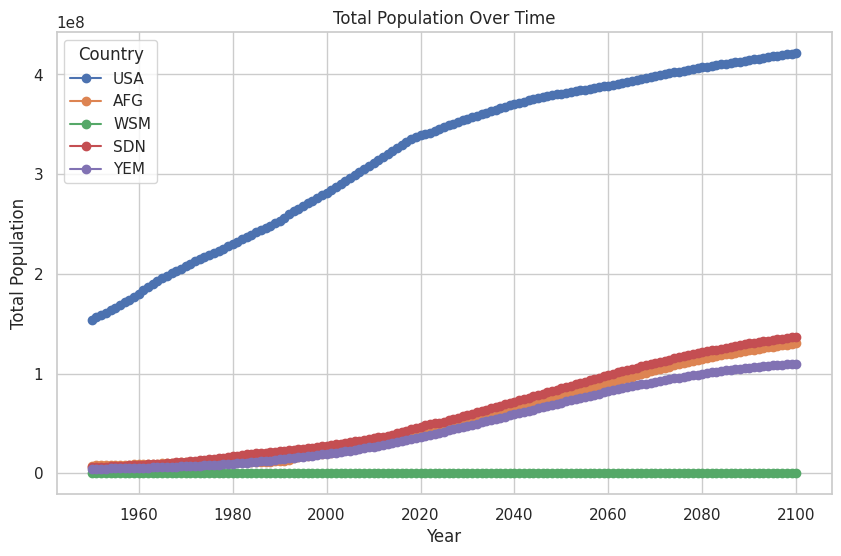

In [ ]:
#directions: create a line plot comparing total population over time 
#read the data 
df_usa = pd.read_csv("/workspaces/07-visualization-ayabz22/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-usa--age--gender--year.csv")
df_afg = pd.read_csv("/workspaces/07-visualization-ayabz22/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-afg--age--gender--year.csv")
df_wsm= pd.read_csv("/workspaces/07-visualization-ayabz22/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-wsm--age--gender--year.csv")
df_sdn = pd.read_csv("/workspaces/07-visualization-ayabz22/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-sdn--age--gender--year.csv")
df_yem = pd.read_csv("/workspaces/07-visualization-ayabz22/ddf--datapoints--population--by--country--age--gender--year/ddf--datapoints--population--by--country-yem--age--gender--year.csv")

#combine them 
df = pd.concat([
    df_usa,
    df_afg,
    df_wsm,
    df_sdn,
    df_yem
], axis=0, ignore_index=True) 

#find the total population by year and country 
total_population = df.groupby(['year', 'country'])['population'].sum().reset_index() 

countries = ['usa', 'afg', 'wsm', 'sdn', 'yem']
total_population = total_population[total_population['country'].isin(countries)]
print(total_population)

plt.figure(figsize=(10, 6))

for country in countries:
    country_data = total_population[total_population['country'] == country]
    plt.plot(country_data['year'], country_data['population'], marker='o', label=country.upper())

plt.title('Total Population Over Time')
plt.xlabel('Year')
plt.ylabel('Total Population')
plt.legend(title='Country')
plt.grid(True)
plt.show()

/tmp/ipykernel_27704/2322340155.py:12: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27704/2322340155.py:15: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



<Figure size 1200x800 with 0 Axes>

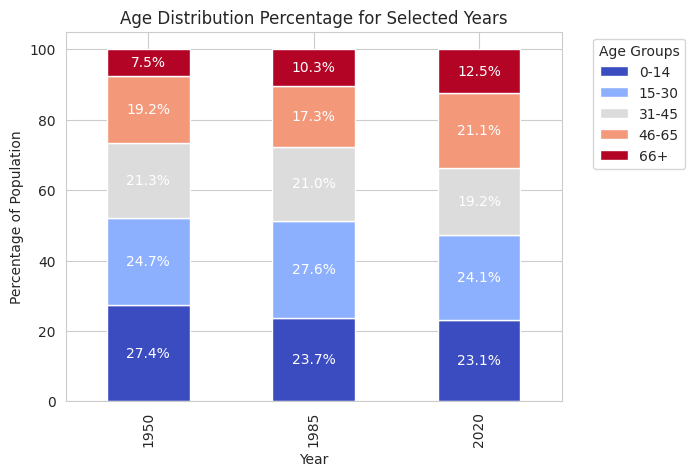

In [8]:
#Make a stacked bar chart 

#make the age groups and the years
bins = [0, 14, 30, 45, 65, 120]
labels = ['0-14', '15-30', '31-45', '46-65', '66+']

#get only the specified years
years_specified = [1950, 1985, 2020]
df_filtered = df[df['year'].isin(years_specified)]

#make a new column called age_group
df_filtered['age_group'] = pd.cut(df_filtered['age'], bins = bins, labels = labels, right=False)

#use groupby to get the age distribution 
age_distribution = df_filtered.groupby(['year', 'age_group'])['population'].sum().unstack()

#do the percentage for each age group
age_totals = age_distribution.sum(axis=1)
percentage = age_distribution.apply(lambda row: row / age_totals[row.name] * 100, axis=1)

#make it stacked
plt.figure(figsize=(12, 8)) 
ax = percentage.plot(kind='bar', stacked=True, colormap='coolwarm')
plt.title('Age Distribution Percentage for Selected Years')
plt.xlabel('Year')
plt.ylabel('Percentage of Population')
plt.legend(title='Age Groups', bbox_to_anchor=(1.05, 1), loc='upper left')

#make the percentages on the bars
for i in range(len(percentage)):
    for j, age_group in enumerate(percentage.columns):
        total = percentage.iloc[i].sum()
        if total > 0:  # Avoid division by zero
            percentage_value = percentage.iloc[i][age_group]
            ax.text(i, percentage.iloc[i].cumsum()[age_group] - (percentage_value / 2),
                    f'{percentage_value:.1f}%', ha='center', va='center', fontsize=10, color='white')

plt.show()






/tmp/ipykernel_27704/3289921969.py:10: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/tmp/ipykernel_27704/3289921969.py:11: FutureWarning:

The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.



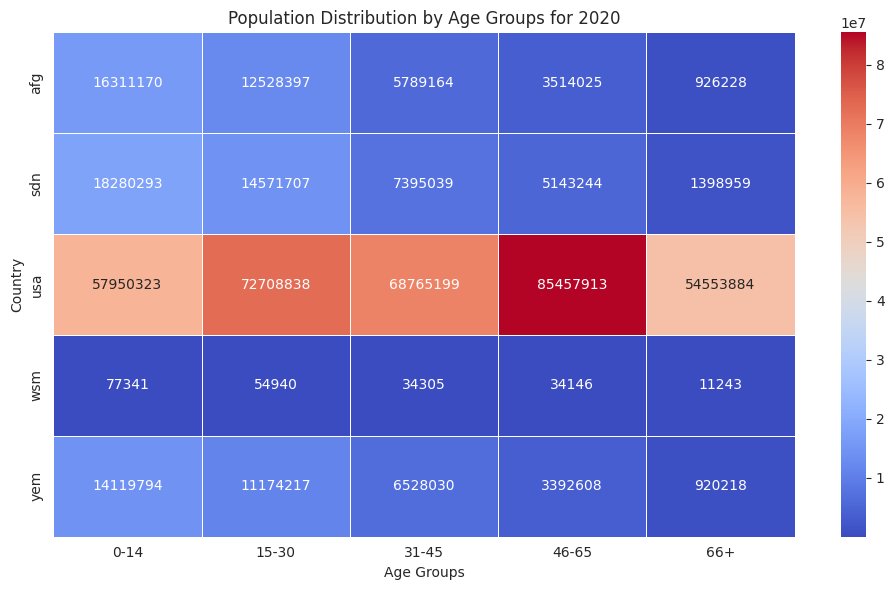

In [6]:
#create a heatmap showing population distribution 

countries = ['usa', 'afg', 'wsm', 'sdn', 'yem']
year_of_interest = 2020
filtered_df = df[(df['year'] == year_of_interest) & (df['country'].isin(countries))]

#group the ages into bins and filter
bins = [0, 14, 30, 45, 65, 120]
labels = ['0-14', '15-30', '31-45', '46-65', '66+']
filtered_df['age_group'] = pd.cut(filtered_df['age'], bins, labels=labels, right=False)
heatmap_data = filtered_df.groupby(['country', 'age_group'])['population'].sum().unstack(fill_value=0)

# make the heatmap
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', fmt='d', linewidths=.5)
plt.title(f'Population Distribution by Age Groups for 2020')
plt.xlabel('Age Groups')
plt.ylabel('Country')
plt.tight_layout() 

plt.show()

Heatmaps are used to assess the magnitude of the values. The darker the color the higher the magnitiude. In this case the darkest color is red which is usa within the agre groip 46-65 which indicates that the population aged 46-65 in the US is way higher compared to other countries listed in this heatmap. So this age group is a big chunk of the total population in the US. 

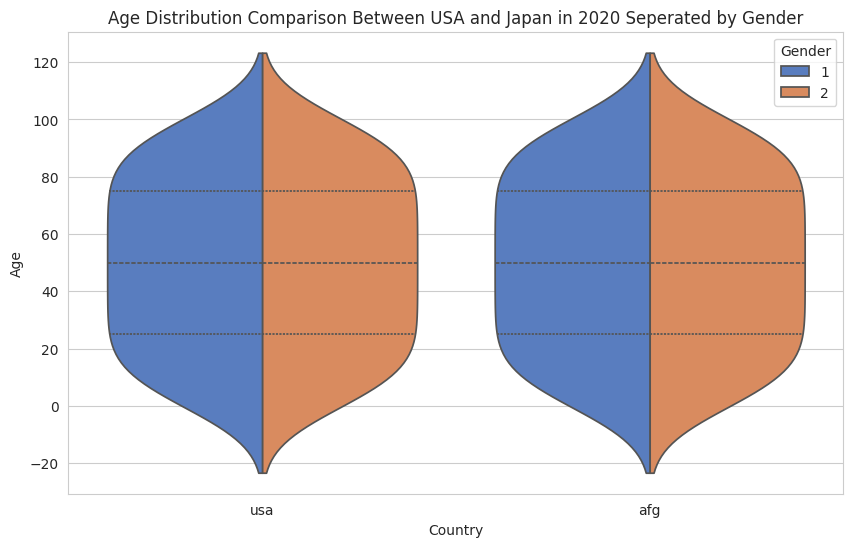

In [ ]:
#violin plots 
# choose 2 countries 
countries = ['usa', 'afg']
year_of_interest = 2020

#filter
filtered_df = df[(df['year'] == year_of_interest) & (df['country'].isin(countries))]

#make the plot 
plt.figure(figsize=(10, 6))
sns.set_style("whitegrid")
sns.violinplot(x='country', y='age', hue='gender', data=filtered_df, split=True, inner='quartile', palette='muted')
plt.title('Age Distribution Comparison Between USA and Japan in 2020 Seperated by Gender')
plt.xlabel('Country')
plt.ylabel('Age')
plt.legend(title='Gender')
plt.show()



The violins for both countries have similar shapes which means the age distributions are quite the same. Their width is also identifical which means their population sizes in each age group are the same between the two countries as well. In other words, the populations of both countries are evenly spread across various age groups. Even the average age are similar.

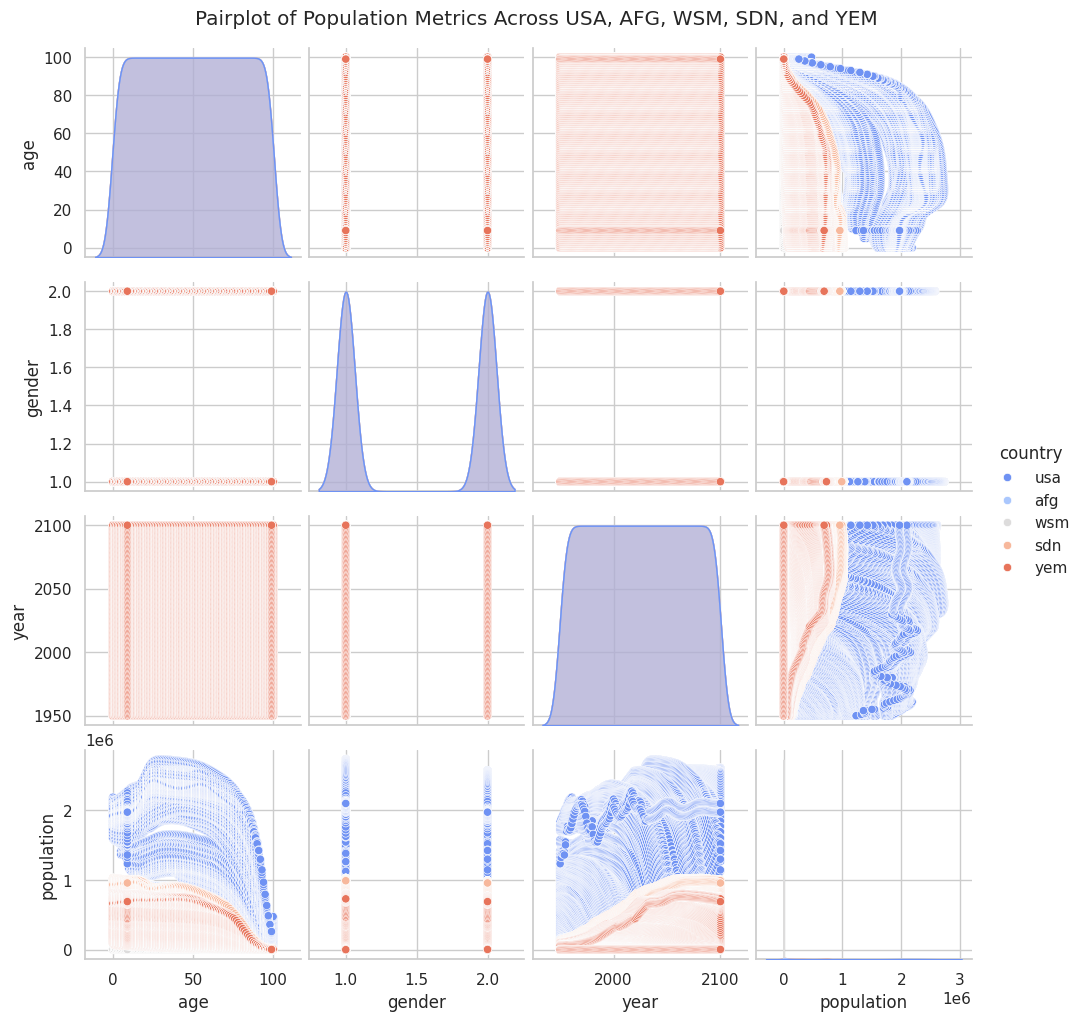

In [12]:
#pairplot 
countries = ['usa', 'afg', 'wsm', 'sdn', 'yem']

#filter 
filtered_df = df[df['country'].isin(countries)]

# Create a pairplot
sns.set(style='whitegrid')
pairplot = sns.pairplot(filtered_df, hue='country', diag_kind='kde', palette='coolwarm')
pairplot.fig.suptitle('Pairplot of Population Metrics Across USA, AFG, WSM, SDN, and YEM', y=1.02)
sns.set_style("whitegrid")
plt.show()

Pair plots are super useful when we want to analyze the trends of multiple variables across different categories. When you look closley you can see how USA is quite overpowering. Let's take population for example, most of the graph is blue implying that US has a way greater population over the years than the other four countries. We can also see this trend when we compare year and population as well as population and age. This finding was also supported in our previous visualizations. 